In [1]:
#!pip install kaggle

In [2]:
from google.colab import files

In [3]:
! mkdir ~/.kaggle

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nrminaxundova","key":"a4fc7ee4798a79ef4730a8883214a208"}'}

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:17<00:00, 38.3MB/s]
100% 2.70G/2.70G [01:17<00:00, 37.4MB/s]


In [8]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [9]:
import numpy as np 
import pandas as pd 
import os

In [10]:
!unzip ./new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [11]:
!ls 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'

train  valid


In [12]:
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [13]:
!nvidia-smi

Sun Nov 14 20:54:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
#pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

In [15]:
import torch
torch.__version__

'1.10.0+cu111'

In [16]:
!pip install --upgrade fastai

     |████████████████████████████████| 189 kB 4.2 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [17]:
import fastai
fastai.__version__

'2.5.3'

In [18]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [19]:
data_path = './new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'

In [20]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

```
class RandomResizedCrop[source]
RandomResizedCrop(size, min_scale=0.08, ratio=(0.75, 1.3333333333333333), resamples=(2, 0), val_xtra=0.14, max_scale=1.0, **kwargs) :: RandTransform
```
Picks a random scaled crop of an image and resize it to size

The crop picked as a random scale in range (min_scale,max_scale) and ratio in the range passed, then the resize is done with resamples[0] for images and resamples[1] for segmentation masks. On the validation set, we center crop the image if it's ratio isn't in the range (to the minmum or maximum value) then resize.

```
crop = RandomResizedCrop(256)
_,axs = plt.subplots(3,3,figsize=(9,9))
for ax in axs.flatten():
    cropped = crop(img)
    show_image(cropped, ctx=ax);
    ```


 Normalize.from_stats(mean,std)]

In [21]:
data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item,
                                    batch_tfms=tfms_for_batch, 
                                    valid_pct=0.15, shuffle=True)

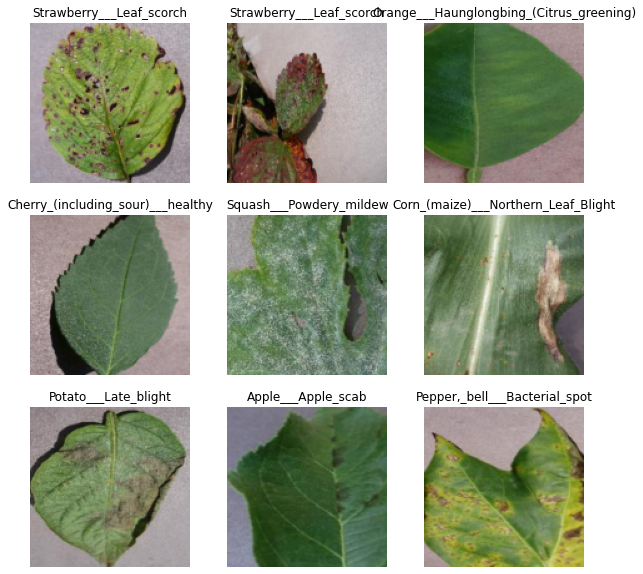

In [22]:
data.show_batch(figsize=(10,10))

In [23]:
#print("Number of classes", data.c)

In [24]:
#[print("Label #{} -> {}\n".format(i,v)) for i,v in enumerate(data.train.vocab)]

In [25]:
 from pathlib import Path
 model = cnn_learner(data, resnet34, metrics=accuracy, model_dir=Path("/kaggle/working/"),path=Path("."))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [26]:
model = cnn_learner(data, resnet34, metrics=accuracy,  model_dir="/tmp/model2/")

SuggestedLRs(valley=0.0012022644514217973)

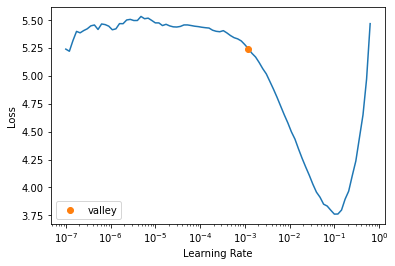

In [27]:
model.lr_find()

In [ ]:
model.fit_one_cycle(2, 12e-3)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
model.save('./my_model.pkl')

In [ ]:
model.export("model")

In [ ]:
!ls /tmp/model/

In [ ]:
!ls

In [ ]:
model.show_results(figsize=(20,20))

In [ ]:
def plot_top_losses_debug(interp,idx, k=9, largest=True, **kwargs):
    if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
    if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
    else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
    k=9
    b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
    x,y,its = interp.dl._pre_show_batch(b, max_n=k)
    b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
    x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
    if its is not None:
        plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses, figsize=(20,20))

In [ ]:
interpretation = ClassificationInterpretation.from_learner(model)
losses, idx = interpretation.top_losses()
#interpretation.plot_top_losses(4, figsize=(15,11))


In [ ]:
plot_top_losses_debug(interpretation,idx, k=9, largest=True,  figsize=(10,10))

In [ ]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interpretation.plot_top_losses(9, figsize=(15,10))

In [ ]:
interpretation.most_confused(min_val=2)